# "Exploring Trump's Tweets: Word Clouds, Named Entities, and Topic Modeling"

## Import all the required libraries

In [41]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import ne_chunk, pos_tag, FreqDist
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
from gensim import corpora
import matplotlib.pyplot as plt
import csv, random, nltk, spacy, re, gensim
import pandas as pd
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]    

True

## Import the Data

In [48]:
#with open('C:/Users/princ/OneDrive/Desktop/Project/Trump_Tweets/trump_tweets.csv'
#         , encoding='utf-8') as tweets:
#    for line in tweets:
#        trump_tweets.append(line.strip())

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/princ/OneDrive/Desktop/Project/Trump_Tweets/trump_tweets.csv', encoding='utf-8')
df['created_at'] = pd.to_datetime(df['created_at'])
df = df[(df['created_at'] >= '2016-07-01') & (df['created_at'] <= '2019-07-01')]
trump_tweets = df['full_text'].tolist()
#trump_tweets = random.sample(trump_tweets, 10)
#print(trump_tweets)

## Data Preprocessing steps

In [50]:
#Remove URL's
tweet = [re.sub(r'(https?://\S+|www\.\S+)', '', word) for word in trump_tweets]
#Remove Special Charecters
tweet = [re.sub(r'[^\w\s\d]', '', word) for word in tweet]
#Remove twitter handles
tweet = [re.sub(r'@\w+', '', word) for word in tweet]
#Remove short words
tweet = [' '.join([word for word in tweet.split() if len(word) > 2]) for tweet in tweet]

In [72]:
#tokenize the tweets using word tokenizer
tokenized_tweets = [word_tokenize(text) for text in tweet]

In [52]:
#Remove stop words from the text
stop_words = set(stopwords.words("english"))
filtered_trump_tweets_tokenized = [[word for word in tweets if word.casefold() not in stop_words] for tweets in tokenized_tweets]

# Parts of Speech Tagging

In [58]:
#Make sure the data is available in a single list for performing pos
flattened_trump_tweets_tokenized = []
for tweet_tokens in filtered_trump_tweets_tokenized:
    for word in tweet_tokens:
        flattened_trump_tweets_tokenized.append(word)
#print(flattened_trump_tweets_tokenized[:10])

#part-of-speech tagging
pos_tagged_tweets = pos_tag(flattened_trump_tweets_tokenized)

['ThrowbackThursday', 'Trump2016', 'Bernie', 'Sanders', 'said', 'Hillary', 'Clinton', 'bad', 'judgement', 'Bills']


## Named Entity Recognition

In [54]:
#Perform Named Entity Recognition (NER)
named_entities_tree = ne_chunk(pos_tagged_tweets)

named_entities = []
for subtree in named_entities_tree:
    if isinstance(subtree, nltk.Tree):
        entity = "".join([word for word, tag in subtree.leaves()])
        named_entities.append(entity)
#print(named_entities)

## Top 20 Most Mentioned Named Entities chart

[('america', 370), ('unitedstates', 233), ('american', 227), ('china', 217), ('great', 202), ('whitehouse', 188), ('fbi', 180), ('russia', 168), ('trump', 163), ('country', 153), ('fakenews', 140), ('northkorea', 139), ('clinton', 134), ('congress', 130), ('mexico', 125), ('crookedhillary', 121), ('senate', 119), ('cnn', 112), ('maga', 110), ('obama', 107)]


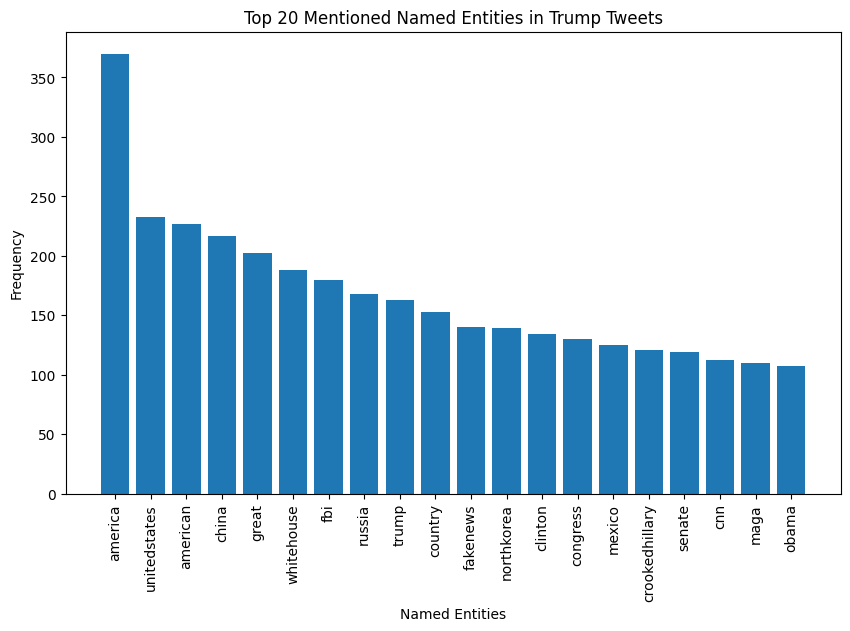

In [55]:
#Bar Chart of the Most Mentioned Named Entities
named_entities = [word.lower() for word in named_entities]
top_entities = Counter(named_entities).most_common(20)
#print(top_entities)
entities, counts = zip(*top_entities)

plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xlabel('Named Entities')
plt.ylabel('Frequency')
plt.title('Top 20 Mentioned Named Entities in Trump Tweets')
plt.xticks(rotation=90)
plt.show()


In his tweets during his presidency, the top 20 mentioned named entities in Trump's tweets reveal a consistent emphasis on America, reflecting his "America First" agenda. 

He also referenced political figures such as "clinton" and "obama," along the relationships with other countries, and media criticism like "russia", "northkorea","china","fbi", "cnn" and "fakenews."

These entities also highlight his frequent references to China, Russia, the FBI, and media criticism, illustrating the key subjects that dominated his Twitter communications during his presidency.

Donald Trump frequently highlighted terms such as "America," "great," and "maga" (Make America Great Again), underscoring his focus on self-image and American-centric themes in his tweets.


## Word Cloud of Named Entities

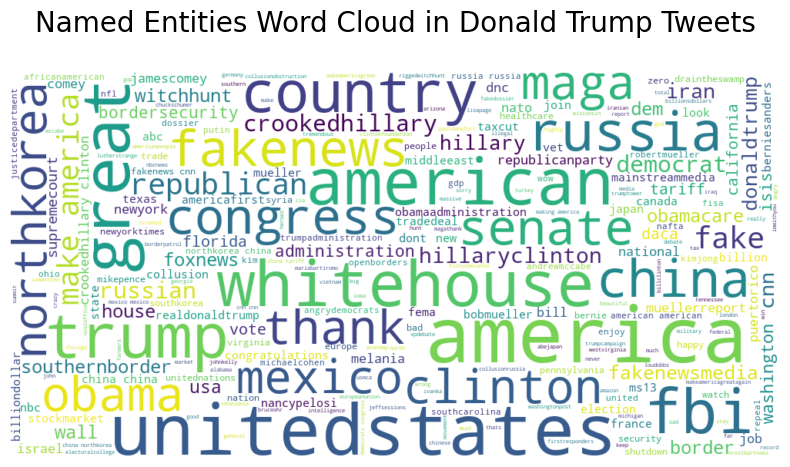

In [56]:
#Word Cloud of Named Entities in Donald Trump Tweets
named_entities_text = ' '.join(named_entities)

wordcloud = WordCloud(max_font_size=100,
                      max_words=250,
                      width=1000, 
                      height=500, 
                      background_color='white',
                      contour_width=3, 
                      contour_color='firebrick'
                      ).generate(named_entities_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Named Entities Word Cloud in Donald Trump Tweets\n', fontsize = 18)
plt.show()

## Topic Modelling on Donald Trump tweets

In [59]:
# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

#Tokenize the text, Extract named entities, lemmetize the tokens by creating a function
def preprocess(text):
    #text = text.lower()
    #text = re.sub(r'http\S+', '', text)  # Remove any URLs in the text
    #ext = re.sub(r'[^a-zA-Z\s]', '', text) #Remove special chars
    #text = text.split()
    #custom_stop_words = ["realdonaldtrump","trump","donaltrump","amp","'",",","@","in","be","the","a","on","that","to","|","`","//t.co","'s","go","and","http","https"]
    #text = [word for word in text if word not in custom_stop_words]
    text = " ".join(text)
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]  # Extract named entities
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and token.text not in entities]
    tokens = "".join(tokens)
    return tokens

processed_tweets = [preprocess(" ".join(tweet)) for tweet in flattened_trump_tweets_tokenized]

In [60]:
#Latent Dirichlet Allocation (LDA) Topic Modeling 

# Create a dictionary and a corpus
doc = [tweet.split() for tweet in processed_tweets]
dictionary = corpora.Dictionary(doc)
corpus = [dictionary.doc2bow(tweet) for tweet in doc]

# Perform LDA topic modeling
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

Topic 0:
0.029*"Great" + 0.028*"country" + 0.020*"trump" + 0.018*"unIted" + 0.018*"get" + 0.017*"medIa" + 0.017*"tIme" + 0.012*"dont" + 0.010*"wall" + 0.010*"lIke"

Topic 1:
0.036*"presIdent" + 0.020*"would" + 0.020*"years" + 0.017*"back" + 0.017*"mexIco" + 0.016*"one" + 0.016*"good" + 0.015*"never" + 0.013*"deal" + 0.012*"dems"

Topic 2:
0.024*"thank" + 0.023*"many" + 0.015*"even" + 0.014*"must" + 0.012*"work" + 0.012*"economy" + 0.012*"day" + 0.012*"collusIon" + 0.012*"crIme" + 0.011*"best"

Topic 3:
0.050*"amp" + 0.034*"people" + 0.030*"border" + 0.022*"chIna" + 0.021*"fake" + 0.018*"want" + 0.013*"job" + 0.011*"make" + 0.011*"ImmIgratIon" + 0.010*"way"

Topic 4:
0.046*"great" + 0.033*"democrats" + 0.024*"bIg" + 0.022*"news" + 0.020*"done" + 0.018*"new" + 0.018*"States" + 0.016*"today" + 0.016*"mueller" + 0.015*"tarIffs"



In [70]:
#Print the topics and their top word:
for topic, words in lda_model.print_topics():
    print(f"Topic {topic + 1}:")
    top_words = words.split("+")
    for word in top_words:
        weight, term = word.split("*")
        print(f"{term.strip()}: {weight.strip()}")
    print()


Topic 1:
"Great": 0.029
"country": 0.028
"trump": 0.020
"unIted": 0.018
"get": 0.018
"medIa": 0.017
"tIme": 0.017
"dont": 0.012
"wall": 0.010
"lIke": 0.010

Topic 2:
"presIdent": 0.036
"would": 0.020
"years": 0.020
"back": 0.017
"mexIco": 0.017
"one": 0.016
"good": 0.016
"never": 0.015
"deal": 0.013
"dems": 0.012

Topic 3:
"thank": 0.024
"many": 0.023
"even": 0.015
"must": 0.014
"work": 0.012
"economy": 0.012
"day": 0.012
"collusIon": 0.012
"crIme": 0.012
"best": 0.011

Topic 4:
"amp": 0.050
"people": 0.034
"border": 0.030
"chIna": 0.022
"fake": 0.021
"want": 0.018
"job": 0.013
"make": 0.011
"ImmIgratIon": 0.011
"way": 0.010

Topic 5:
"great": 0.046
"democrats": 0.033
"bIg": 0.024
"news": 0.022
"done": 0.020
"new": 0.018
"States": 0.018
"today": 0.016
"mueller": 0.016
"tarIffs": 0.015



#### Based on the topics extracted from the LDA topic modeling of Trump's tweets during his presidential tenure (from July 2016 to July 2019), here are potential insights:

#### Topic 0: Gratitude and Positivity
#### This topic appears to be focused on expressions of gratitude and positivity. Phrases like "Great" and "thank" indicate a positive sentiment. The reference to "country", "united" suggests a sense of national pride and appreciation. "trump" may indicate self-referencing, while "media" indicates his interaction with the media.

#### Topic 1: Country and Leadership
#### This Topic appears to revolve around the themes of leadership and the country. Phrases like "president" suggest discussions related to leadership, while "years" and "back" could indicate a retrospective view on his presidency. "Mexico" may imply discussions about international relations, and "dems" may represent a reference to the Democratic Party.

#### Topic 2: Appreciation and Hard Work
#### This topic seems to emphasize appreciation and hard work. Phrases like "thank" and "many" suggest expressions of gratitude and acknowledgment. The reference to "work," "economy," and "best" may indicate discussions about economic achievements and the value of hard work.

#### Topic 3: Border Security and International Relations
#### This topic seems to revolve around discussions related to border security and international relations. Phrases like "amp," "border," and "China" suggest a focus on international matters. "fake" may hint at discussions regarding fake news, and "job" and "Immigration" could relate to the job market and immigration policies.

#### Topic 4:  Achievements and News
#### This topic appears to reflect discussions about achievements and news. The repeated use of "great" implies a sense of accomplishment. "democrats" and "new" suggest discussions about political developments and changes. References to "news," "today," and "Mueller" may indicate comments on current events and news coverage.

## "In conclusion, our analysis of Donald Trump's tweets using word clouds,named entities, and topic modeling provides valuable insights into his communication style and the topics he frequently discusses on Twitter."